# Colab/Local Setup

In [0]:
#Local Setup
# use conda: conda install -c conda-forge fbprophet
# !pip install gdown

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Setup and download data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import gdown
import re
from matplotlib.cbook import boxplot_stats

In [0]:
gdown.download('https://drive.google.com/uc?export=download&id=1TW6f4cn6F990cq6Mjo_uTXckTZW_XBWb', 'merged_data.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1TW6f4cn6F990cq6Mjo_uTXckTZW_XBWb
To: /content/merged_data.zip
100%|██████████| 1.05M/1.05M [00:00<00:00, 80.9MB/s]


'merged_data.zip'

In [0]:
!unzip -qq merged_data.zip -d data/

In [0]:
basepath = Path('.')

In [0]:
datapath = basepath/'data'

In [0]:
data = pd.read_csv(datapath/'merged_data.csv')

# Explore Data

In [0]:
from fbprophet import Prophet

In [0]:
data['Date of Sale'] = pd.to_datetime(data['Date of Sale'])

In [0]:
data.head()

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,Present Value
0,1 KING ALBERT PARK,KING ALBERT PARK,Condominium,21,RCR,Freehold,Resale,1.0,1668888.0,NaN,1173.0,Strata,01 to 05,1422.0,2019-09-01,1668888.0
1,# 1 LOFT,LORONG 24 GEYLANG,Apartment,14,RCR,Freehold,Resale,1.0,675000.0,NaN,570.0,Strata,01 to 05,1183.0,2019-09-01,675000.0
2,1 KING ALBERT PARK,KING ALBERT PARK,Condominium,21,RCR,Freehold,Resale,1.0,1900000.0,NaN,1281.0,Strata,01 to 05,1483.0,2019-08-01,1900000.0
3,1 KING ALBERT PARK,KING ALBERT PARK,Condominium,21,RCR,Freehold,Resale,1.0,1880000.0,NaN,1281.0,Strata,01 to 05,1468.0,2019-07-01,1880000.0
4,1 CANBERRA,CANBERRA DRIVE,Executive Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1.0,845000.0,NaN,958.0,Strata,01 to 05,882.0,2019-07-01,845000.0


In [0]:
condo_price = data.loc[data['Type'] == 'Condominium',['Date of Sale', 'Price ($)']]

In [0]:
condo_price.head()

,Date of Sale,Price ($)
0,2019-09-01,1668888.0
2,2019-08-01,1900000.0
3,2019-07-01,1880000.0
5,2019-07-01,2180000.0
12,2019-01-01,1850000.0


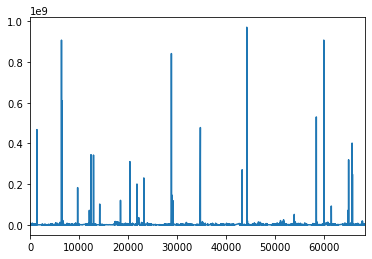

In [0]:
condo_price['Price ($)'].plot()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e40495278>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e40495cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e404a3710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e404a33c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e404955f8>,
  <matplotlib.lines.Line2D at 0x7f7e404959b0>]}

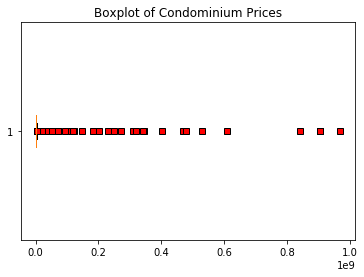

In [0]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Condominium Prices')
ax1.boxplot(condo_price['Price ($)'], vert=False, flierprops=red_square)

In [0]:
outliers = boxplot_stats(condo_price['Price ($)']).pop(0)['fliers']
outlier_condos = data[(data['Type'] == 'Condominium') & (data['Price ($)'].isin(outliers))]
outlier_condos['Project Name'].unique()

array(['8 SAINT THOMAS', "D'GROVE VILLAS", "D'LEEDON",
       'DAKOTA RESIDENCES', 'AALTO', 'A TREASURE TROVE', 'DORMER PARK',
       'DRAYCOTT EIGHT', 'DUCHESS CREST', 'DUCHESS RESIDENCES',
       'DUNEARN GARDENS', 'EASTERN LAGOON', 'ELIZABETH HEIGHTS',
       'FIFTH AVENUE CONDOMINIUM', 'FLORIDIAN', 'FONTANA HEIGHTS',
       'FOUR SEASONS PARK', 'ALLSWORTH PARK',
       'FRASER RESIDENCE ORCHARD SINGAPORE', 'FULCRUM', 'GALLOP GREEN',
       'GALLOP GABLES', 'GARDENVILLE', 'GLENTREES', 'AMBER PARK',
       'AMARYLLIS VILLE', 'GOLDENHILL PARK CONDOMINIUM',
       'GOODLUCK GARDEN', 'GRAMERCY PARK', 'GOODWOOD RESIDENCE',
       "GRAND DUCHESS AT ST PATRICK'S", 'GRANDE VISTA',
       'GRANGE RESIDENCES', 'GRANGE INFINITE', 'AMBER RESIDENCES',
       'HALLMARK RESIDENCES', 'HAIG COURT', 'HAWAII TOWER',
       'HIGHLINE RESIDENCES', 'HILLTOPS', 'HOLLAND RESIDENCES',
       'HOLLAND PEAK', 'HOLLANDIA', 'HORIZON TOWERS', 'ARDMORE II',
       'ISLAND VIEW', 'JADESCAPE', 'JADE MANSION', 'ARDM

In [0]:
ts_condo = data.loc[data['Type'] == 'Condominium', 
                    ['Date of Sale','Price ($)']]\
                    .groupby('Date of Sale').median().reset_index()

In [0]:
ts_condo.columns = ['ds', 'y']

In [0]:
ts_condo.head()

,ds,y
0,2016-09-01,1282000.0
1,2016-10-01,1040000.0
2,2016-11-01,1082000.0
3,2016-12-01,1240000.0
4,2017-01-01,1275000.0


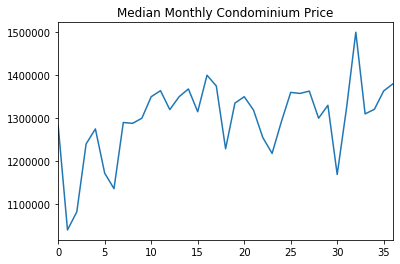

In [0]:
ts_condo['y'].plot(title='Median Monthly Condominium Price')

# Create Median Forecast Model

In [0]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(ts_condo)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


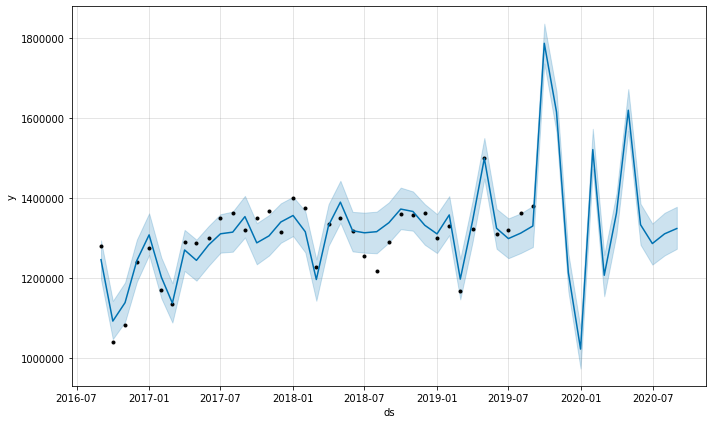

In [0]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)

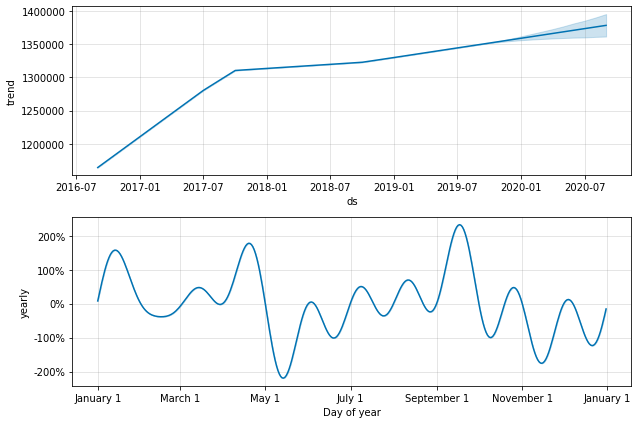

In [0]:
comp = model.plot_components(forecast)

In [0]:
from fbprophet.diagnostics import cross_validation

In [0]:
model_cv = cross_validation(model = model, 
                            initial = pd.to_timedelta(24,unit="M"),
                            period = pd.to_timedelta(1,unit="M"),
                            horizon = pd.to_timedelta(3,unit="M"))
model_cv

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning:

M and Y units are deprecated and will be removed in a future version.

/usr/local/lib/python3.6/dist-packages/pandas/core/tools/timedeltas.py:134: FutureWarning:

M and Y units are deprecated and will be removed in a future version.

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-10-01 04:39:54 and 2019-06-01 16:32:42
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:n_changepoints greater than number of observations.Using 22.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:n_changepoints greater than number of observations.Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-11-01,1.329458e+06,1.304917e+06,1.355831e+06,1357600.0,2018-10-01 04:39:54
1,2018-12-01,1.036799e+06,1.012297e+06,1.062302e+06,1363000.0,2018-10-01 04:39:54
2,2018-11-01,1.329458e+06,1.305867e+06,1.354893e+06,1357600.0,2018-10-31 15:09:00
3,2018-12-01,1.036799e+06,1.014079e+06,1.060262e+06,1363000.0,2018-10-31 15:09:00
4,2019-01-01,1.173111e+06,1.146130e+06,1.199987e+06,1300000.0,2018-10-31 15:09:00
5,2019-01-01,1.262149e+06,1.222321e+06,1.301927e+06,1300000.0,2018-12-01 01:38:06
6,2019-02-01,1.335411e+06,1.294254e+06,1.377377e+06,1330000.0,2018-12-01 01:38:06
7,2019-03-01,1.157857e+06,1.118532e+06,1.197838e+06,1169000.0,2018-12-01 01:38:06
8,2019-01-01,1.262149e+06,1.220911e+06,1.302187e+06,1300000.0,2018-12-31 12:07:12
9,2019-02-01,1.335411e+06,1.296495e+06,1.373720e+06,1330000.0,2018-12-31 12:07:12


In [0]:
from fbprophet.diagnostics import performance_metrics
model_perf = performance_metrics(model_cv)
model_perf

,horizon,mse,rmse,mae,mape,coverage
0,0 days 11:52:48,1.112342e+09,33351.785409,32996.538191,0.024923,0.5
1,1 days 01:23:42,7.299466e+08,27017.524713,21531.572485,0.016518,1.0
2,29 days 01:23:42,6.788959e+07,8239.514037,7816.834390,0.006417,1.0
3,29 days 04:25:30,4.999579e+09,70707.702393,54936.580859,0.037608,0.5
4,29 days 07:27:18,7.046719e+09,83944.735202,82140.473124,0.057694,0.0
5,29 days 14:54:36,2.528761e+09,50286.788282,47031.867583,0.035592,0.5
6,29 days 17:56:24,2.423529e+09,49229.356035,46209.845076,0.035165,0.5
7,30 days 08:51:00,5.519977e+10,234946.310192,194693.360148,0.143780,0.0
8,30 days 19:20:06,5.359953e+10,231515.718912,177171.328139,0.130027,0.0
9,30 days 22:21:54,1.112342e+09,33351.785409,32996.538191,0.024923,0.5


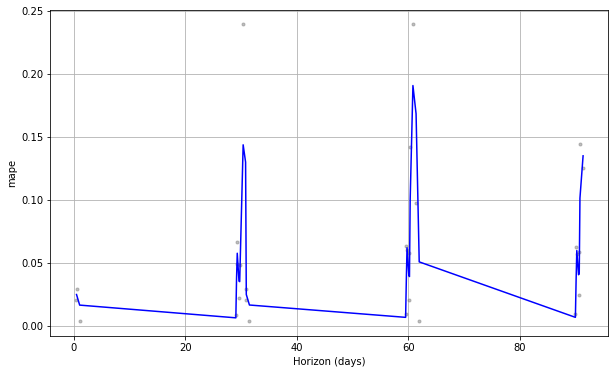

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(model_cv, metric='mape')

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mean_absolute_percentage_error(model_cv.y, model_cv.yhat) # whole

6.139457347876292

In [0]:
quarter_forecast= forecast.loc[37:39,['ds', 'trend', 'yhat', 'multiplicative_terms']]

In [0]:
quarter_forecast['weights'] = [0.4, 0.3, 0.3]

In [0]:
quarter_forecast

,ds,trend,yhat,multiplicative_terms,weights
37,2019-09-30,1.351841e+06,1.787746e+06,0.322453,0.4
38,2019-10-31,1.354307e+06,1.615774e+06,0.193063,0.3
39,2019-11-30,1.356694e+06,1.214364e+06,-0.104909,0.3


In [0]:
weighted_multiplier = 1 + sum(quarter_forecast['multiplicative_terms'] * 
                              quarter_forecast['weights'])

In [0]:
d = {'Multiplier':[weighted_multiplier]}
mul_df = pd.DataFrame.from_dict(d)
mul_df

,Multiplier
0,1.155427


In [0]:
mul_df.to_csv('future_price_multiplier.csv',index=False)